# Linear Discriminant Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time

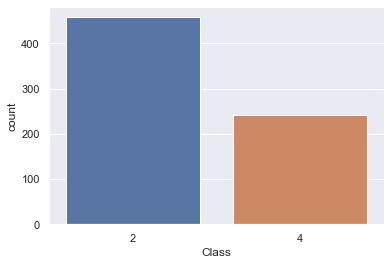

X shape = 
(699, 9)
Y shape = 
(699,)
[[ 0.2995061   0.28957312  1.11907675 ...  0.04124139 -0.32425801
   1.41611311]
 [ 2.25768045  2.30456946 -0.62247087 ...  0.04124139 -0.32425801
   1.41611311]
 [-0.67958108 -0.71792505  0.07414818 ... -0.60816532 -0.32425801
  -0.70615828]
 ...
 [-0.67958108 -0.71792505 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]
 [-0.67958108 -0.71792505 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]
 [-0.67958108 -0.71792505 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]]
[[-0.67958108 -0.38209233 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]
 [-0.35321869 -0.38209233 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]
 [ 0.95223088  0.96123857  2.16400532 ...  1.66475816 -0.32425801
  -0.70615828]
 ...
 [ 0.62586849  0.96123857  2.51231485 ...  0.04124139 -0.32425801
   1.41611311]
 [-0.67958108 -0.71792505 -0.62247087 ... -0.60816532 -0.32425801
  -0.70615828]
 [-0.67958108 -0.71792505 -0.62247087 ... -0.60816532  0.281

In [10]:
# starting time
start = time.time()
# Reading excel file
data = pd.read_excel(r"C:\Users\sriva\OneDrive\Desktop\Python_for_ML_project_dataset\breast-cancer-wisconsin.xlsx")
df = pd.DataFrame(data)

# Using seaborn to plot bar-graph of classes
sns.countplot(df['Class'])
plt.show()

# Removing the column 'sample code number' by dropping it
df.drop(['sample code number'], axis = 1, inplace = True)

# X is the data including all the features(Here, 9)
X = df.iloc[:, 1:].values
# y is the 'Class' values
y = df['Class'].values
print("X shape = ")
print(X.shape)
print("Y shape = ") 
print(y.shape)

# Using train test split 
# training data and testing data is divided as 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

# Using StandardScaler to standardize the data
# Standardize is to remove the mean and scale each feature to unit variance
# In normal words, it transforms the data in such a way that
# mean = 0 and standard deviation = 1
sc = StandardScaler()
# fit_transform is used on training data
# fit method is calculating the mean and variance of each of the features present in our data
# transform method is transforming all the features using the respective mean and variance
X_train = sc.fit_transform(X_train)
# transform is used on testing data
# Using the transform method we can use the same mean and variance 
# as it is calculated from our training data to transform our test data 
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# LDA is the imported function from sklearn
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(classification_report(y_pred,y_test))
# stoping time
end = time.time()
# Print the runtime
print(f"The runtime is {end - start}" + "sec")